# Pivot Tables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Database use of this section 
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Pivot Tables by Hand

In [4]:
# three of every four females on board survived
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [6]:
# go one step deeper and look at survival by both sex and, say, class
# manual pivot tables
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot Table Syntax

In [9]:
# same result using pivot table
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multi-level pivot tables

In [11]:
#  pivot tables can be specified with multiple levels
# using pd.cut to get age intervals
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [23]:
# using pd.qcut to automatically compute quantiles
fare = pd.qcut(titanic['fare'], 2)
# Sex and age use as multi Index
# Fare pair and class use as columns
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [22]:
# using fare paid mean
fare = pd.cut(titanic['fare'], [0, titanic['fare'].mean(), titanic['fare'].max()])
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (0.0, 32.204]                     (32.204, 512.329]         \
class                   First    Second     Third             First Second   
sex    age                                                                   
female (0, 18]            NaN  1.000000  0.536585          0.909091   1.00   
       (18, 80]      0.875000  0.890909  0.454545          0.984848   1.00   
male   (0, 18]            NaN  0.545455  0.268293          0.800000   0.75   
       (18, 80]      0.484848  0.080000  0.118557          0.333333   0.00   

fare                   
class           Third  
sex    age             
female (0, 18]   0.00  
       (18, 80]  0.00  
male   (0, 18]   0.00  
       (18, 80]  0.75

### Additional pivot table options

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

In [27]:
# using sum aggfunc and fare as mean
# mean aggregation by default
# Notice also here the values keyword are omitted; when specifying a mapping for aggfunc, this is determined automatically
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [29]:
# margin compute total (here mean) along each grouping
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Example: Birthrate Data

In [31]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [33]:
# load data
births = pd.read_csv('births.csv')

In [34]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [35]:
# take a look at male and female births using pivot table
births['decade'] = 10 * (births['year'] // 10) # getting decade
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


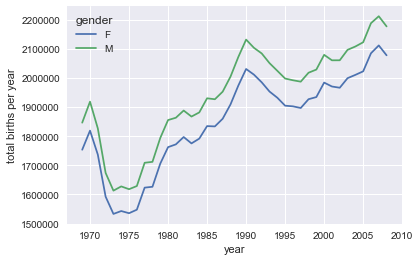

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

# See the annual trend in births by gender. 
# It appears that over the past 50 years male births have outnumbered female births by around 5%

### Further data exploration

In [39]:
# This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution 
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(sig)

689.31


In [42]:
# filtering data
# get only middle 50% of data
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [43]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [45]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

# get day of week
births['dayofweek'] = births.index.dayofweek
births['dayofweek'].head()

1969-01-01    2
1969-01-01    2
1969-01-02    3
1969-01-02    3
1969-01-03    4
Name: dayofweek, dtype: int64

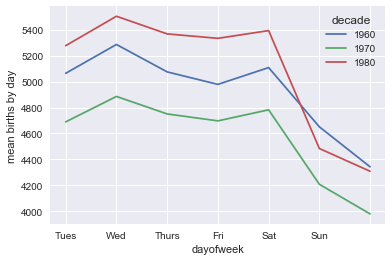

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [57]:
births.index

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)

In [53]:
# let's plot mean number of births by the day of the year
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [54]:
# months and days into a date by associating them with a dummy year variable
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

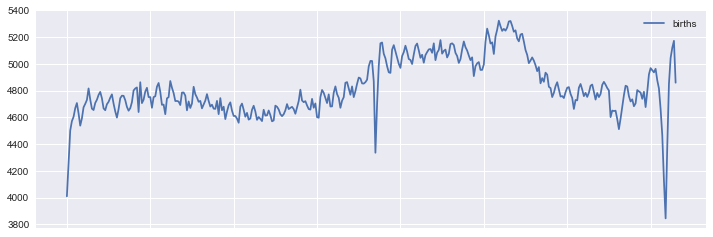

In [59]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day)